In [ ]:
# Dependencies for entire notebook here
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load MNIST data
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255
mnist_train_labels = to_categorical(mnist_train_labels)
mnist_test_labels = to_categorical(mnist_test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Take a look at the training data
print('Training images shape: ', mnist_train_images.shape)
print('Training labels shape: ', mnist_train_labels.shape)
print('Shape of an image: ', mnist_train_images[0].shape)
print('Example label: ', mnist_train_labels[0])

Training images shape:  (60000, 28, 28, 1)
Training labels shape:  (60000, 10)
Shape of an image:  (28, 28, 1)
Example label:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


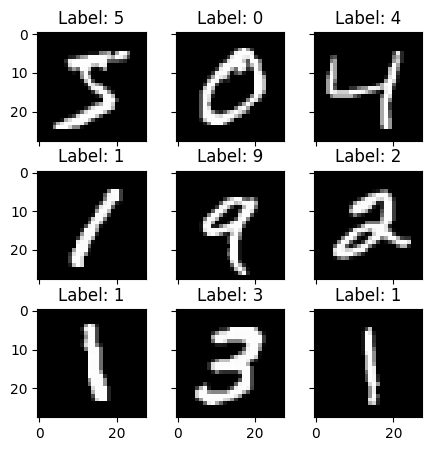

In [ ]:
# Review a few images
image_list = mnist_train_images[:9]
image_list_labels = mnist_train_labels[:9]

# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html#imagegrid
fig = plt.figure(1, (5., 5.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 3x3 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
                 )

for i in range(len(image_list)):
    image = image_list[i].reshape(28, 28)
    grid[i].imshow(image, cmap='gray')
    grid[i].set_title('Label: {0}'.format(image_list_labels[i].argmax()))

plt.show()

In [ ]:
# To run nicely in jupyter notebook
# No need for InteractiveSession in TensorFlow 2.x
# sess = tf.InteractiveSession()

In [ ]:

# Load MNIST data
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255
mnist_train_labels = to_categorical(mnist_train_labels)
mnist_test_labels = to_categorical(mnist_test_labels)


## Benchmark CNN (for testing)

Based on challenge requirements, building model using tensorflow low-level API

In [ ]:
# Functions for creating weights and biases
# https://www.tensorflow.org/get_started/mnist/pros
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# Functions for convolution and pooling functions
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pooling_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [ ]:
# Create placeholders nodes for images and label inputs
# x = tf.placeholder(tf.float32, shape=[None, 784])
# y_ = tf.placeholder(tf.float32, shape=[None, 10])

Benchmark model to be used for testing classification on real images with and without noise

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model

# Helper functions for initializing weights and biases
def weight_variable(shape):
    return tf.Variable(tf.random.truncated_normal(shape, stddev=0.1))

def bias_variable(shape):
    return tf.Variable(tf.constant(0.1, shape=shape))

# Convolution and pooling functions (TensorFlow 2.x uses layers API)
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pooling_2x2(x):
    return tf.nn.max_pool2d(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Input layer
inputs = Input(shape=(28, 28, 1))

# Conv layer 1 - 32x5x5
x_conv1 = Conv2D(32, (5, 5), activation='relu', padding='same')(inputs)
x_pool1 = MaxPooling2D((2, 2), padding='same')(x_conv1)

# Conv layer 2 - 64x5x5
x_conv2 = Conv2D(64, (5, 5), activation='relu', padding='same')(x_pool1)
x_pool2 = MaxPooling2D((2, 2), padding='same')(x_conv2)

# Flatten
x_flat = Flatten()(x_pool2)

# Dense fully connected layer
x_fc1 = Dense(1024, activation='relu')(x_flat)

# Regularization with dropout
keep_prob = 0.5  # set dropout probability
x_fc1_drop = Dropout(1 - keep_prob)(x_fc1)

# Classification layer
#outputs = Dense(10, activation='softmax')(x_fc1_drop)

# Model
#model = Model(inputs=inputs, outputs=outputs)

# Print model summary
#model.summary()

# Classification layer without softmax activation (logits)
logits = Dense(10)(x_fc1_drop)

# Apply softmax to logits to get probabilities
y = tf.nn.softmax(logits)

# Model
model = Model(inputs=inputs, outputs=y)


# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0   

In [ ]:
# Example training (this would go in your training cell)
model.fit(mnist_train_images, mnist_train_labels, epochs=2, batch_size=64, validation_data=(mnist_test_images, mnist_test_labels))

Epoch 1/2
938/938 [==============================] - 218s 232ms/step - loss: 0.2472 - accuracy: 0.9254 - val_loss: 0.0870 - val_accuracy: 0.9742
Epoch 2/2
938/938 [==============================] - 212s 226ms/step - loss: 0.0930 - accuracy: 0.9721 - val_loss: 0.0528 - val_accuracy: 0.9816


In [ ]:
# Probabilities - output from model (not the same as logits)
# y = tf.nn.softmax(y_conv)

In [ ]:
# Loss and optimizer
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
# train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [ ]:
# Setup to test accuracy of model
# correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# Initilize all global variables
# sess.run(tf.global_variables_initializer())

In [ ]:
# Train model
# Run once to get the model to a good confidence level
# for i in range(1000):
#    batch = mnist.train.next_batch(100)
#    if i%200 == 0:
#        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
#        print("step %d, training accuracy %g"%(i, train_accuracy))
#
#    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.4})

step 0, training accuracy 0.1
step 200, training accuracy 0.92
step 400, training accuracy 0.91
step 600, training accuracy 0.95
step 800, training accuracy 0.97


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(mnist_test_images[:500], mnist_test_labels[:500], verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


16/16 - 0s - loss: 0.0363 - accuracy: 0.9900 - 433ms/epoch - 27ms/step
Test accuracy: 99.00%


In [ ]:
def plot_predictions(image_list, output_probs=False, adversarial=False):
    '''
    Evaluate images against trained model and plot images.
    If adversarial == True, replace middle image title appropriately
    Return probability list if output_probs == True
    '''
    prob = model.predict(image_list)  # Use the Keras model's predict method

    pred_list = np.zeros(len(image_list)).astype(int)
    pct_list = np.zeros(len(image_list)).astype(int)

    # Setup image grid
    import math
    cols = 3
    rows = math.ceil(image_list.shape[0]/cols)
    fig = plt.figure(1, (12., 12.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(rows, cols),  # creates grid of axes
                     axes_pad=0.5,  # pad between axes in inch.
                     )

    # Get probs, images and populate grid
    for i in range(len(prob)):
        pred_list[i] = np.argmax(prob[i])  # for mnist index == classification
        pct_list[i] = prob[i][pred_list[i]] * 100

        image = image_list[i].reshape(28, 28)
        grid[i].imshow(image, cmap='gray')

        grid[i].set_title('Label: {0} \nCertainty: {1:.2f}%' \
                          .format(pred_list[i],
                                  pct_list[i]))

        # Only use when plotting original, partial deriv and adversarial images
        if (adversarial) & (i % 3 == 1):
            grid[i].set_title("Adversarial \nPartial Derivatives")

    plt.show()

    return prob if output_probs else None


In [ ]:
# Get 10 2s from top 500, nonzero returns tuple, get index[0], then first 10
index_of_2s = np.nonzero(mnist_test_labels[:500, 2])[0][:10]
x_batch = mnist_test_images[index_of_2s]

# Verify the shapes and contents
print("Indices of '2's: ", index_of_2s)
print("Shape of x_batch: ", x_batch.shape)


Indices of '2's:  [  1  35  38  43  47  72  77  82 106 119]
Shape of x_batch:  (10, 28, 28, 1)


1/1 [==============================] - 0s 126ms/step


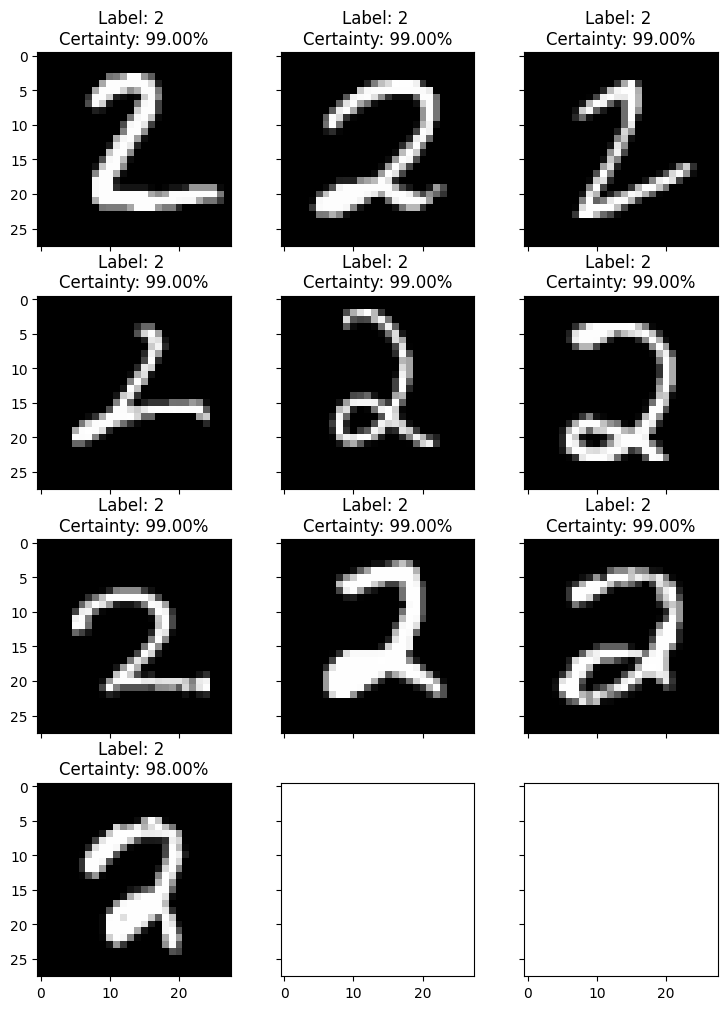

In [ ]:
plot_predictions(x_batch)

All above 2s are correctly classified, although at varying degrees of certainty (mostly above 95%)

## Adversarial Images

Expand on benchmark model using low-level API. Create adversarial image of a 2 to be misclassified as a 6

1/1 [==============================] - 0s 70ms/step


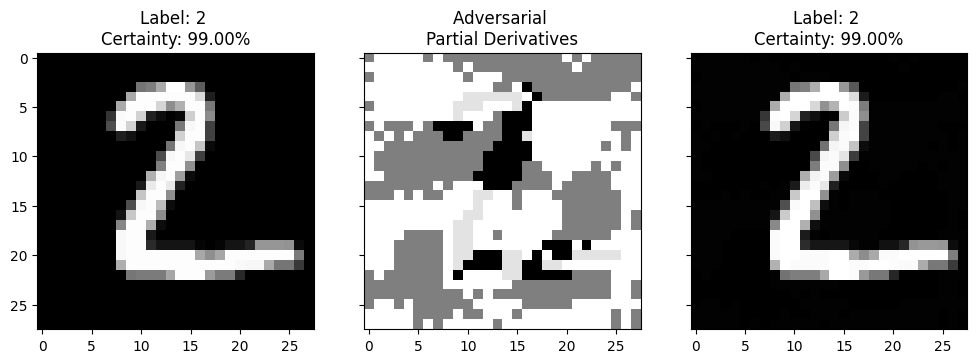

1/1 [==============================] - 0s 116ms/step


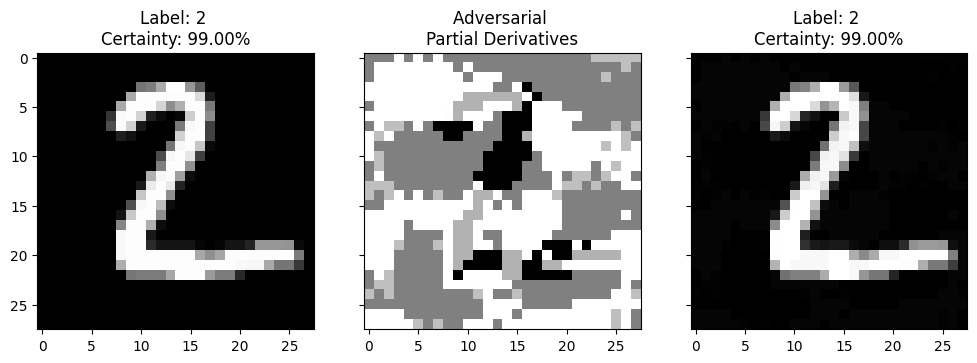

1/1 [==============================] - 0s 27ms/step


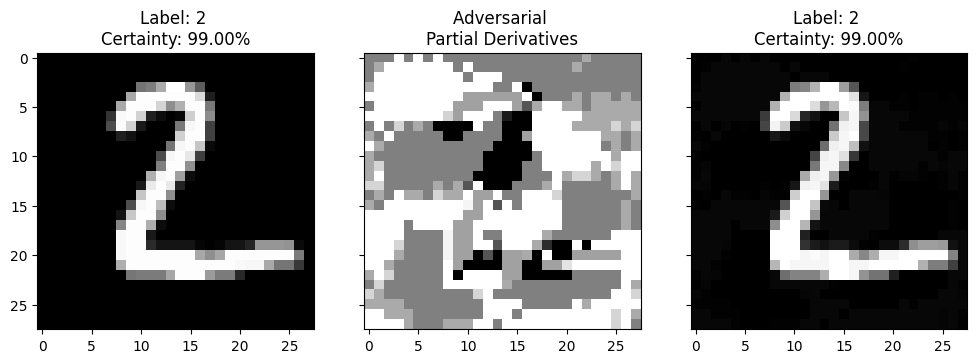

1/1 [==============================] - 0s 25ms/step


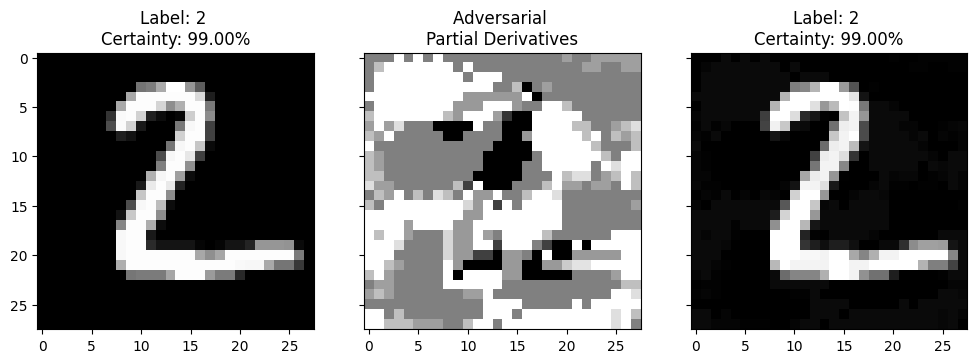

1/1 [==============================] - 0s 27ms/step


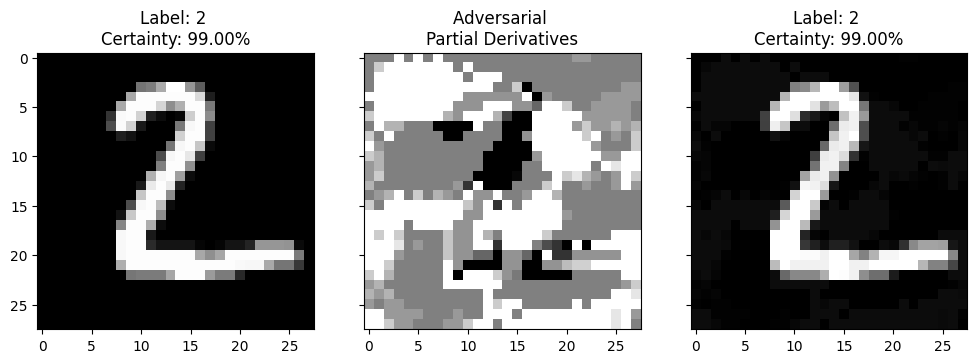

1/1 [==============================] - 0s 25ms/step


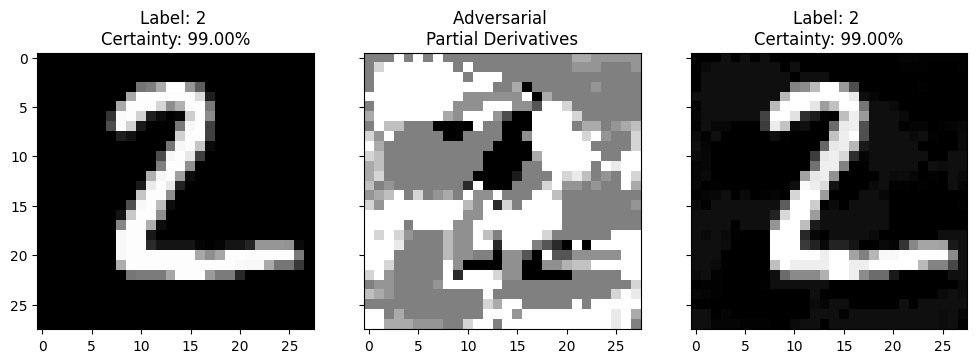

1/1 [==============================] - 0s 28ms/step


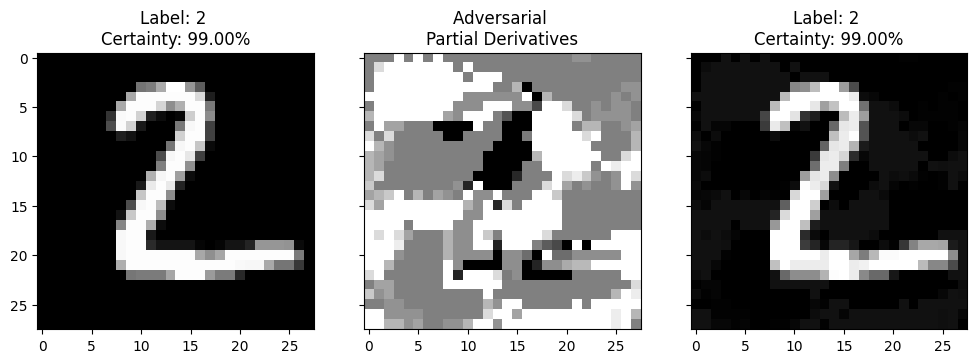

1/1 [==============================] - 0s 26ms/step


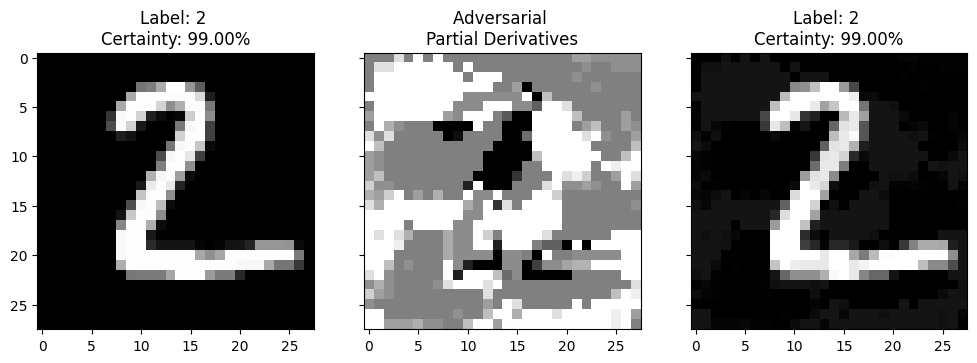

1/1 [==============================] - 0s 38ms/step


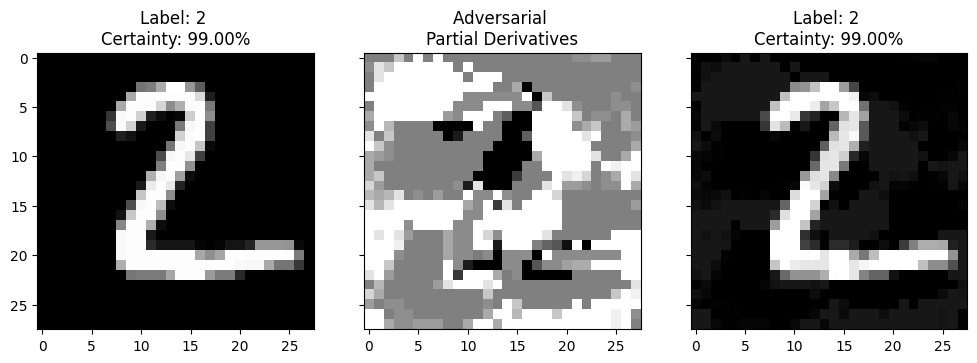

1/1 [==============================] - 0s 38ms/step


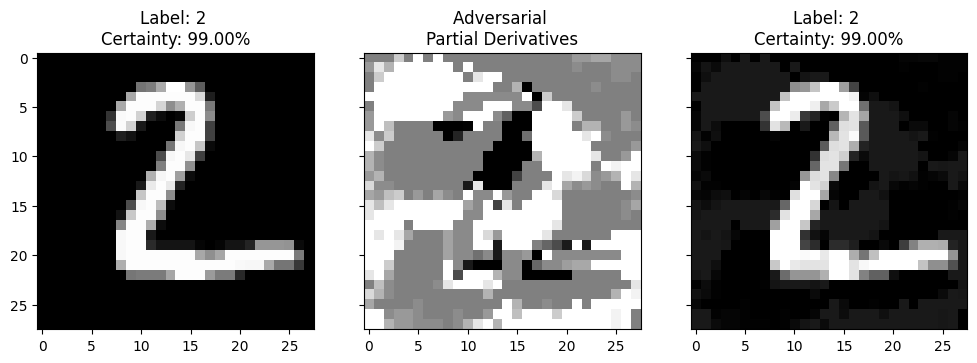

[array([[1.0159537e-05, 9.2420570e-04, 9.9905080e-01, 6.9877365e-06,
         1.7212950e-09, 7.1487811e-08, 3.4854800e-06, 8.9868823e-09,
         4.3385689e-06, 2.0415937e-10]], dtype=float32),
 array([[9.2177024e-06, 6.6970609e-04, 9.9930823e-01, 6.0447305e-06,
         1.4536843e-09, 5.9495964e-08, 2.8693951e-06, 8.8870795e-09,
         3.9226898e-06, 1.6914371e-10]], dtype=float32),
 array([[8.0436403e-06, 4.8619334e-04, 9.9949479e-01, 5.1851443e-06,
         1.2213330e-09, 4.5871548e-08, 2.2221013e-06, 8.5277962e-09,
         3.3794154e-06, 1.3843125e-10]], dtype=float32),
 array([[7.2490579e-06, 3.5190230e-04, 9.9963152e-01, 4.5027555e-06,
         1.0293030e-09, 3.7292150e-08, 1.7858958e-06, 8.5174197e-09,
         3.0117355e-06, 1.1760250e-10]], dtype=float32),
 array([[6.2944869e-06, 2.5905794e-04, 9.9972659e-01, 3.9433903e-06,
         8.6834329e-10, 2.9751853e-08, 1.4067929e-06, 8.3819778e-09,
         2.6068096e-06, 9.6068771e-11]], dtype=float32),
 array([[5.5126657e-06, 1

In [ ]:
def create_plot_adversarial_images(x_image, y_label, lr=0.1, n_steps=1, output_probs=False):
    '''
    Create and plot adversarial images using the specified parameters.

    Parameters:
        x_image (np.array): The original image.
        y_label (np.array): The true label of the image.
        lr (float): The learning rate for the adversarial attack.
        n_steps (int): The number of steps for the adversarial attack.
        output_probs (bool): Whether to output probabilities.

    Returns:
        probs_per_step (list): List of probabilities per step if output_probs is True.
    '''
    original_image = x_image
    probs_per_step = []

    # Ensure the image has the correct shape and convert to tensor
    x_image = tf.convert_to_tensor(x_image.reshape((1, 28, 28, 1)), dtype=tf.float32)
    original_image = tf.convert_to_tensor(original_image.reshape((1, 28, 28, 1)), dtype=tf.float32)
    y_label = tf.convert_to_tensor(y_label, dtype=tf.float32)

    for step in range(n_steps):
        with tf.GradientTape() as tape:
            tape.watch(x_image)
            logits = model(x_image)
            loss = tf.keras.losses.categorical_crossentropy(y_label, logits, from_logits=True)

        gradient = tape.gradient(loss, x_image)
        signed_grad = tf.sign(gradient)
        x_image = x_image - lr * signed_grad / n_steps
        x_image = tf.clip_by_value(x_image, 0, 1)  # Ensure the values are in the valid range

        # Collecting probabilities for each step if needed
        if output_probs:
            probs = model.predict(x_image)
            probs_per_step.append(probs)

        # Create an array of 3 images - original, noise/delta, adversarial
        noise = x_image - original_image
        img_adv_list = np.vstack((original_image.numpy(), noise.numpy(), x_image.numpy()))

        # Plotting images
        plot_predictions(img_adv_list, output_probs=output_probs, adversarial=True)

    return probs_per_step if output_probs else None

# Example usage:
# Assuming we have a sample image of '2' and its one-hot encoded label
index_of_2 = np.nonzero(mnist_test_labels[:, 2])[0][0]
x_image = mnist_test_images[index_of_2]
y_label = mnist_test_labels[index_of_2].reshape(1, -1)

create_plot_adversarial_images(x_image, y_label, lr=0.1, n_steps=10, output_probs=True)


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Pick a random 2 image from the first 1000 images
index_of_2s = np.nonzero(mnist_test_labels[:1000, 2])[0]
rand_index = np.random.randint(0, len(index_of_2s))
image_norm = mnist_test_images[index_of_2s[rand_index]]
image_norm = image_norm.reshape((1, 28, 28, 1))  # Reshape for the model input

# Create adversarial target label 6
label_adv = to_categorical(6, num_classes=10).reshape(1, -1)

# Verify the shapes and contents
print("Random index of '2': ", rand_index)
print("Shape of image_norm: ", image_norm.shape)
print("Adversarial label (one-hot encoded): ", label_adv)


Random index of '2':  31
Shape of image_norm:  (1, 28, 28, 1)
Adversarial label (one-hot encoded):  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


1/1 [==============================] - 0s 28ms/step


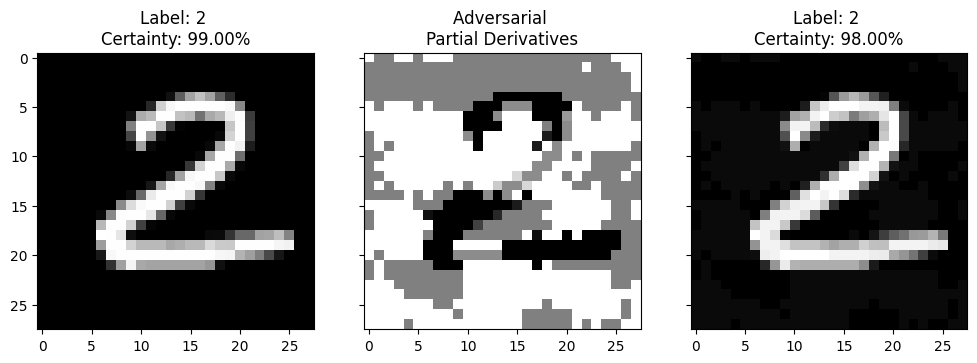

1/1 [==============================] - 0s 29ms/step


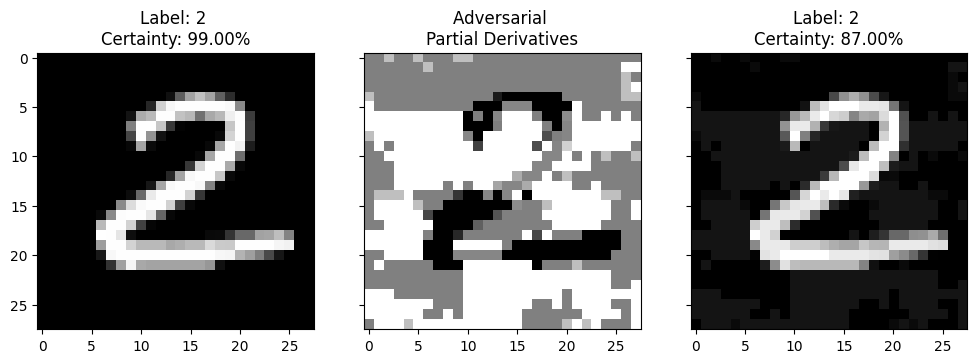

1/1 [==============================] - 0s 27ms/step


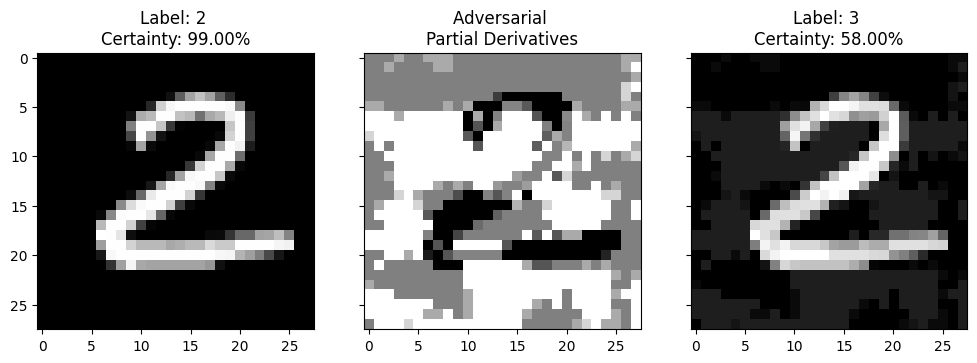

1/1 [==============================] - 0s 27ms/step


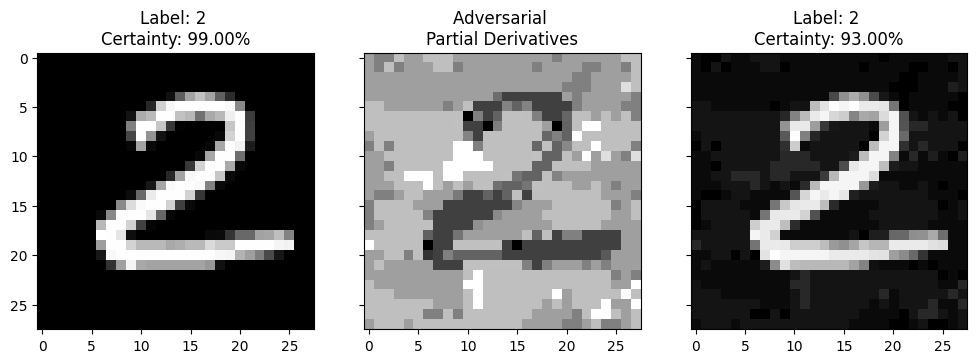

1/1 [==============================] - 0s 26ms/step


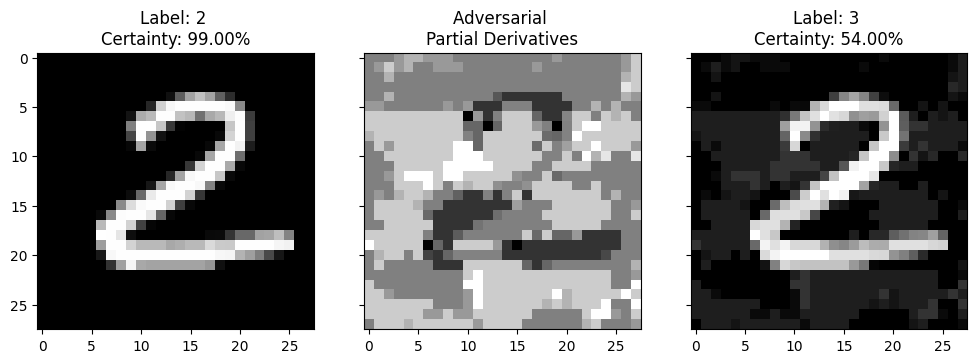

[array([[9.3342660e-06, 6.2364939e-05, 9.8472470e-01, 1.2569190e-02,
         1.8388104e-07, 9.6707772e-06, 3.5105659e-06, 2.7998310e-06,
         2.6152458e-03, 3.0334340e-06]], dtype=float32),
 array([[4.0925985e-05, 1.4983329e-04, 8.7159276e-01, 1.1664345e-01,
         9.2398824e-07, 7.3992138e-05, 1.1758301e-05, 1.3940801e-05,
         1.1435338e-02, 3.7085279e-05]], dtype=float32),
 array([[8.2194725e-05, 2.0180631e-04, 3.9133134e-01, 5.8189487e-01,
         2.6691528e-06, 3.0364943e-04, 1.9833880e-05, 3.5052057e-05,
         2.5899794e-02, 2.2881021e-04]], dtype=float32),
 array([[7.6553988e-05, 1.9160239e-04, 9.3940133e-01, 4.3514989e-02,
         2.1077005e-06, 9.5293515e-05, 3.1457206e-05, 1.3637811e-05,
         1.6627016e-02, 4.6044162e-05]], dtype=float32),
 array([[1.6597196e-04, 2.6027294e-04, 3.8312817e-01, 5.4533237e-01,
         6.8985228e-06, 8.1235258e-04, 5.9422415e-05, 4.4361765e-05,
         6.9547378e-02, 6.4279966e-04]], dtype=float32)]

In [ ]:
# Plot adversarial images
# Over each step, model certainty changes from 2 to 6
create_plot_adversarial_images(image_norm, label_adv, lr=0.2, n_steps=5, output_probs=True)

# Task 2.4 Answers

To reason how adversarial images are produced, let's break down the process:
Adversarial Image Generation

Original Image and Target Label:
    Start with an original image, e.g., a digit '2' from the MNIST dataset.
    Define a target label for the adversarial attack, e.g., the digit '6'.

Loss Calculation:
    Compute the loss between the model's prediction for the original image and the target label. This is typically done using a loss function like categorical cross-entropy.

Gradient Calculation:
    Calculate the gradient of the loss with respect to the input image. This gradient tells us how to change the image to increase the loss.

Image Perturbation:
    Modify the image slightly in the direction of the gradient. The modification is controlled by a learning rate parameter. This step is repeated multiple times to incrementally adjust the image.

Clipping:
    After each modification, ensure the pixel values remain valid (e.g., between 0 and 1 for normalized images).

The resulting image will look similar to the original but will be misclassified by the model as the target label due to the small perturbations.

### Comparison with Random Noise Image

Next, let's classify a random noise image as '9' and compare the results with the adversarial image process:
Random Noise Image Classification

Generate Random Noise Image:
    Create a random image with the same dimensions as the MNIST images.

Assign Target Label:
    Assign a one-hot encoded target label, e.g., for the digit '9'.

Classify Using the Model:
    Directly classify the random noise image using the model.

1/1 [==============================] - 0s 60ms/step


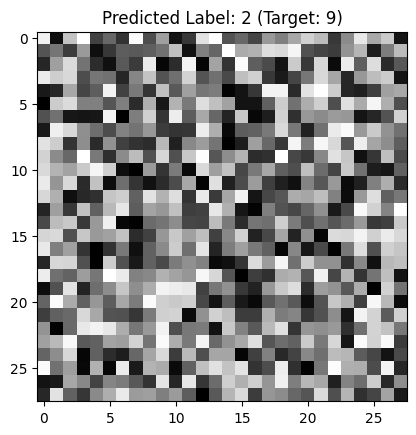

1/1 [==============================] - 0s 50ms/step


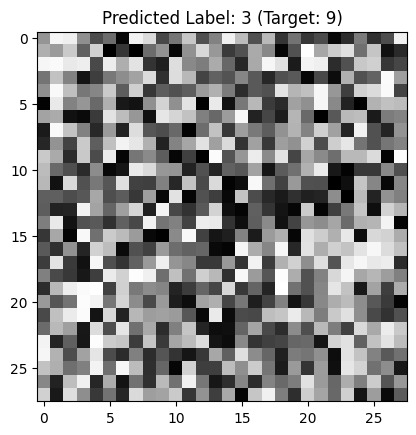

1/1 [==============================] - 0s 71ms/step


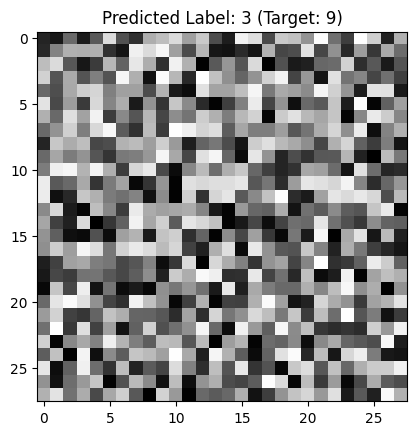

1/1 [==============================] - 0s 45ms/step


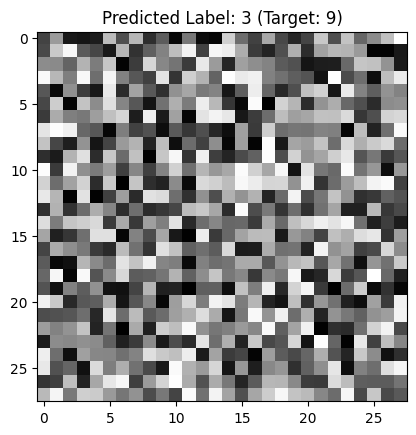

1/1 [==============================] - 0s 58ms/step


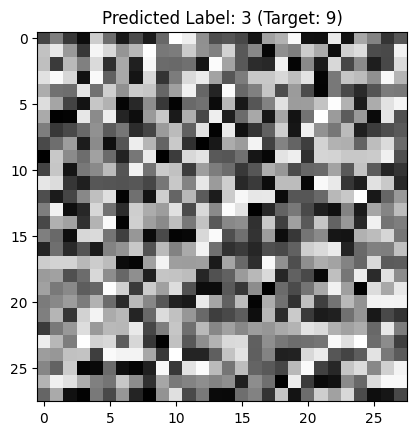

[array([[0.00254325, 0.02015731, 0.33058694, 0.32623404, 0.00242175,
         0.07010808, 0.00144612, 0.00321971, 0.24278565, 0.00049723]],
       dtype=float32),
 array([[2.3010150e-03, 1.4432270e-02, 3.4371069e-01, 3.8665950e-01,
         3.3535718e-03, 1.6003925e-01, 3.2482191e-03, 9.9881552e-03,
         7.5961404e-02, 3.0595990e-04]], dtype=float32),
 array([[9.9484739e-04, 5.7291812e-03, 5.6390397e-02, 8.0855417e-01,
         1.4128215e-03, 3.7378822e-02, 4.3066478e-04, 1.5211049e-03,
         8.6721316e-02, 8.6665148e-04]], dtype=float32),
 array([[4.6247113e-04, 1.6551827e-03, 1.6107695e-02, 9.3367183e-01,
         8.7572850e-04, 1.3769210e-02, 1.5727525e-04, 2.9121048e-03,
         2.8585747e-02, 1.8028207e-03]], dtype=float32),
 array([[0.00137201, 0.01085493, 0.18219972, 0.54601943, 0.00077345,
         0.03865137, 0.00069474, 0.00060616, 0.21816836, 0.00065983]],
       dtype=float32)]

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Define a function to create and plot random noise images
def plot_random_noise_images(target_label, n_images=5, output_probs=False):
    '''
    Create and plot random noise images to be classified by the model.

    Parameters:
        target_label (int): The target label for comparison in plotting.
        n_images (int): Number of random noise images to generate.
        output_probs (bool): Whether to output probabilities.

    Returns:
        probs (list): List of probabilities if output_probs is True.
    '''
    probs_list = []
    img_adv_list = []

    for i in range(n_images):
        noise_image = np.random.rand(28, 28, 1)  # Random noise image
        noise_image = noise_image.reshape((1, 28, 28, 1))
        img_adv_list.append(noise_image[0, :, :, 0])

        # Model prediction
        probs = model.predict(noise_image)
        pred_label = np.argmax(probs, axis=1)[0]

        # Collecting probabilities for each image if needed
        if output_probs:
            probs_list.append(probs)

        # Plotting the image
        plt.imshow(noise_image[0, :, :, 0], cmap='gray')
        plt.title(f"Predicted Label: {pred_label} (Target: {target_label})")
        plt.show()

    return probs_list if output_probs else None

# Example usage:
# Classify random noise images and compare with target label '9'
plot_random_noise_images(target_label=9, n_images=5, output_probs=True)
